<h1>Setup</h1>

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [486]:
data = pd.read_csv('data.csv')

In [487]:
data.head()

,Date,Location,Operator,Aircraft_Type,Registration,Fatalities,Total_Onboard,Ground_Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,?,1,2,0
1,1909-09-07,"Juvisy-sur-Orge, France",?,Wright Byplane,SC1,1,1,0
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,?,5,5,0
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,?,1,1,0
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),?,14,20,0


Adding some columns for later use

In [488]:
# Get the year from the date column.
data['Year'] = pd.to_datetime(data['Date']).dt.year
# Get total fatalities per year by adding fatalities and ground fatalities
data['Total_Fatalities'] = data['Fatalities'] + data['Ground_Fatalities']
# Calculate the fatality rate (fatalities/total onboard)
data['Fatality_Rate'] = data['Fatalities'] / data['Total_Onboard']
data.head()

,Date,Location,Operator,Aircraft_Type,Registration,Fatalities,Total_Onboard,Ground_Fatalities,Year,Total_Fatalities,Fatality_Rate
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,?,1,2,0,1908,1,0.5
1,1909-09-07,"Juvisy-sur-Orge, France",?,Wright Byplane,SC1,1,1,0,1909,1,1.0
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,?,5,5,0,1912,5,1.0
3,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,?,1,1,0,1913,1,1.0
4,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),?,14,20,0,1913,14,0.7


<h1>Basic Visualizations</h1>

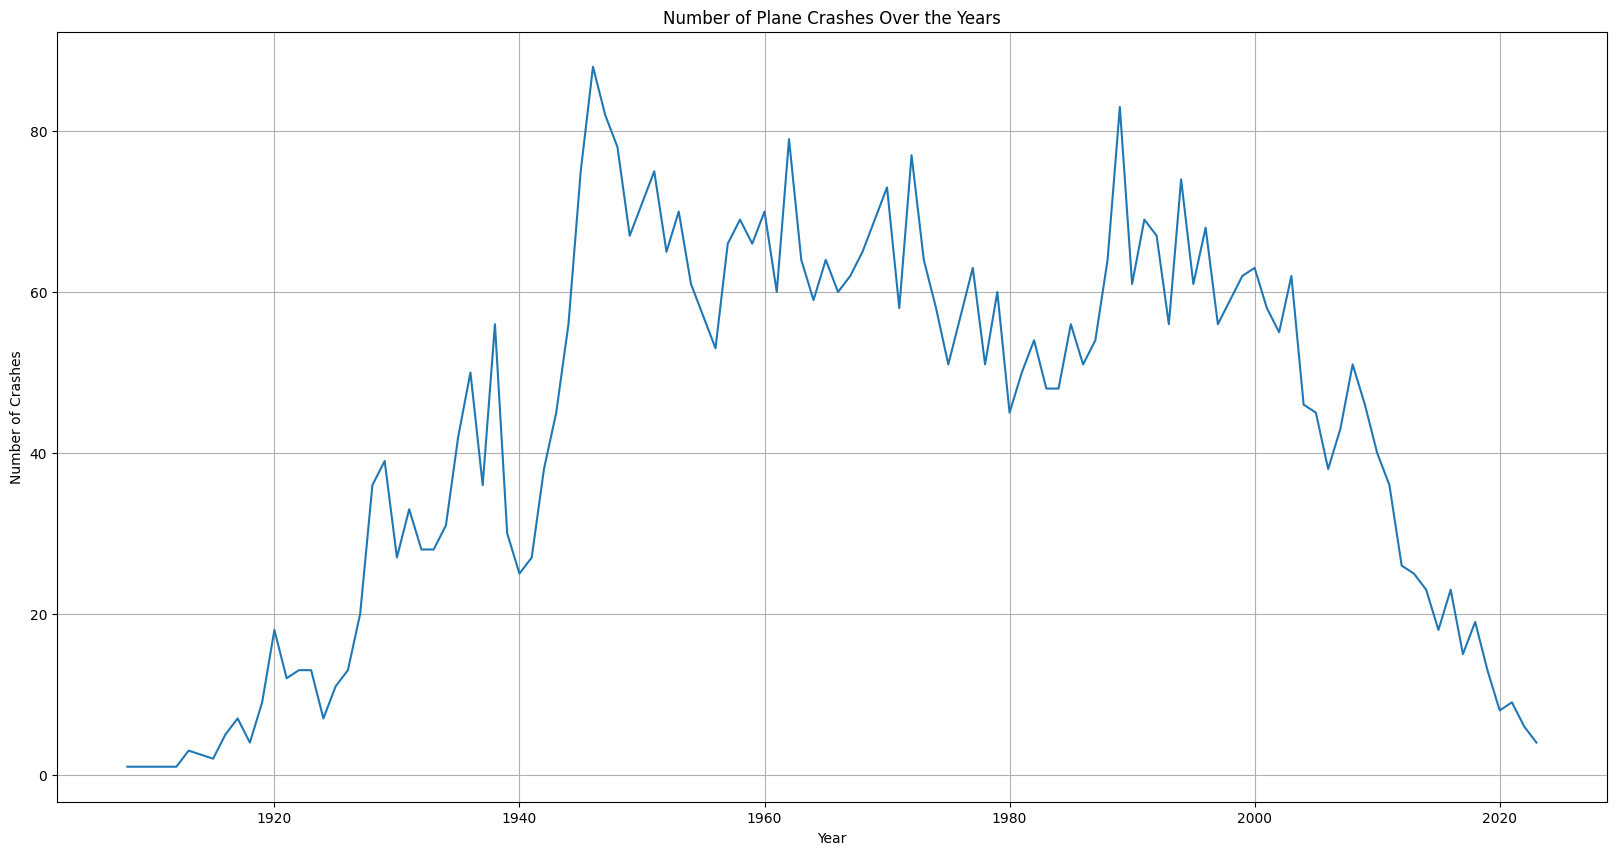

In [489]:
# Count the number of crashes per year
crashes_per_year = data['Year'].value_counts().sort_index()
# Plotting the trend of crashes over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x=crashes_per_year.index, y=crashes_per_year.values)
plt.title('Number of Plane Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

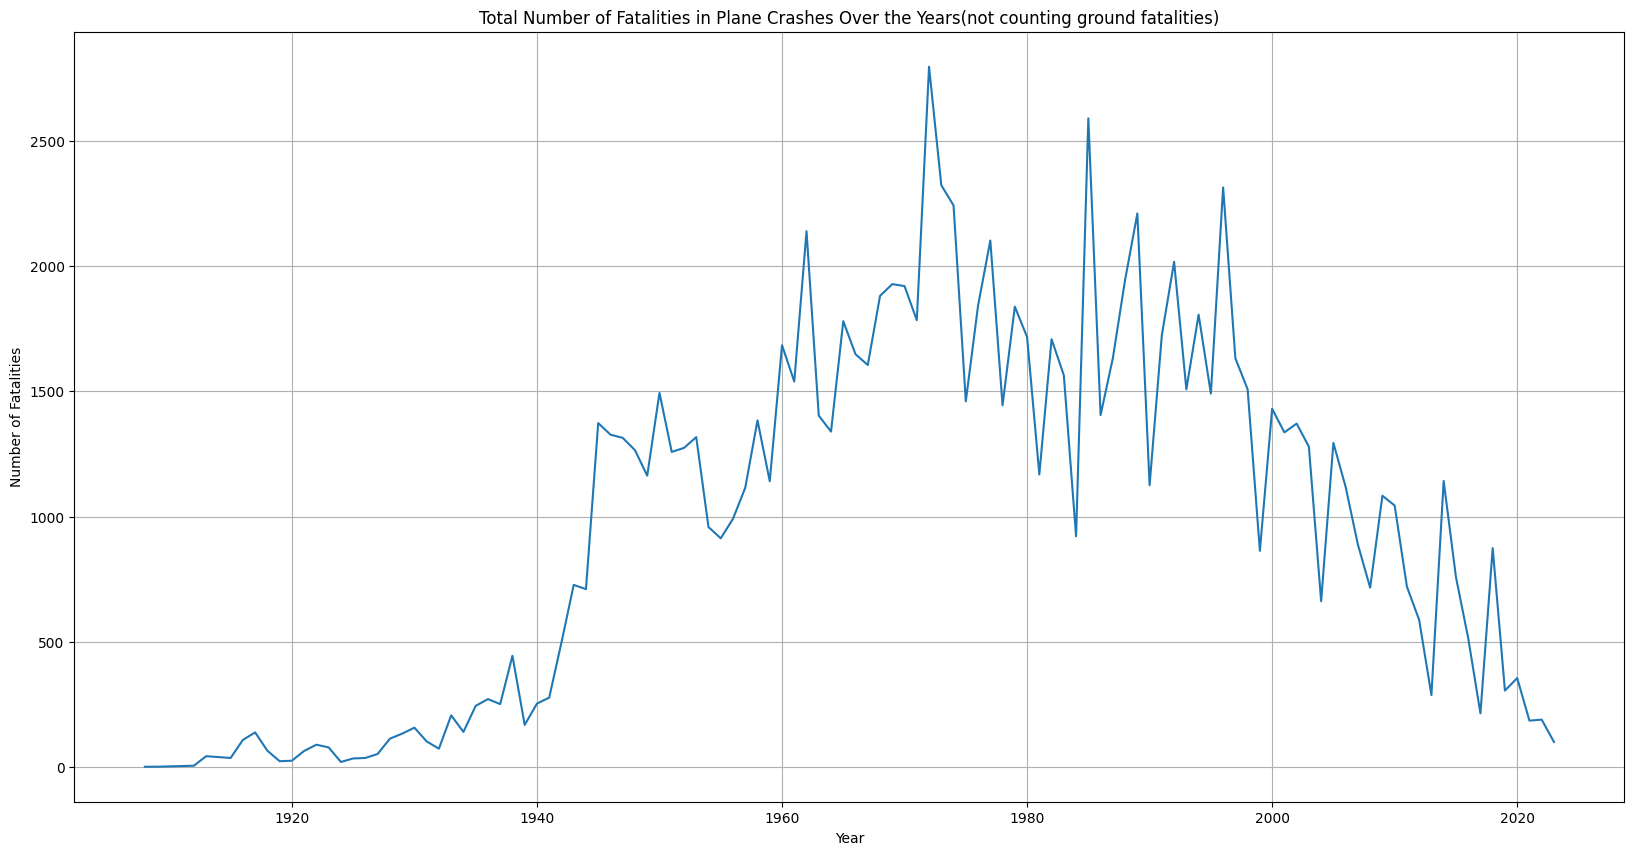

In [490]:
# Aggregating the total fatalities by year
fatalities_per_year = data.groupby('Year')['Fatalities'].sum()
# Plotting the trend of fatalities over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x=fatalities_per_year.index, y=fatalities_per_year.values)
plt.title('Total Number of Fatalities in Plane Crashes Over the Years(not counting ground fatalities)')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

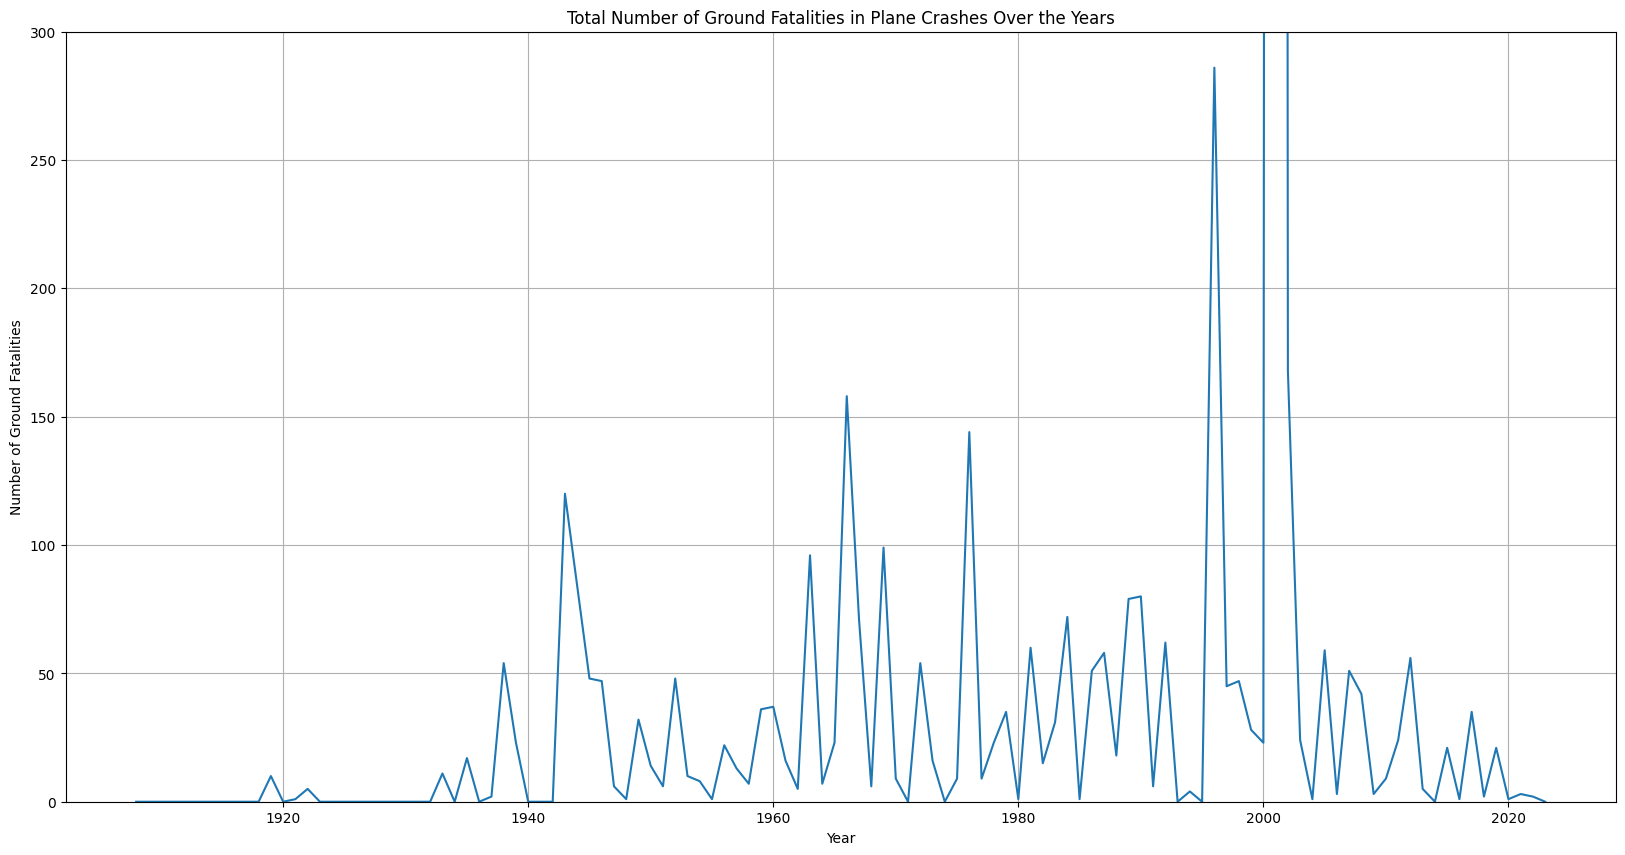

In [491]:
# Aggregating the total ground fatalities by year, excluding the year 2001
ground_fatalities = data.groupby('Year')['Ground_Fatalities'].sum()
# Plotting the trend of ground fatalities over the years, excluding 2001
plt.figure(figsize=(20, 10))
sns.lineplot(x=ground_fatalities.index, y=ground_fatalities.values)
plt.title('Total Number of Ground Fatalities in Plane Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Ground Fatalities')
plt.ylim(0, 300)  # Setting the y-axis limit to 500
plt.grid(True)
plt.show()

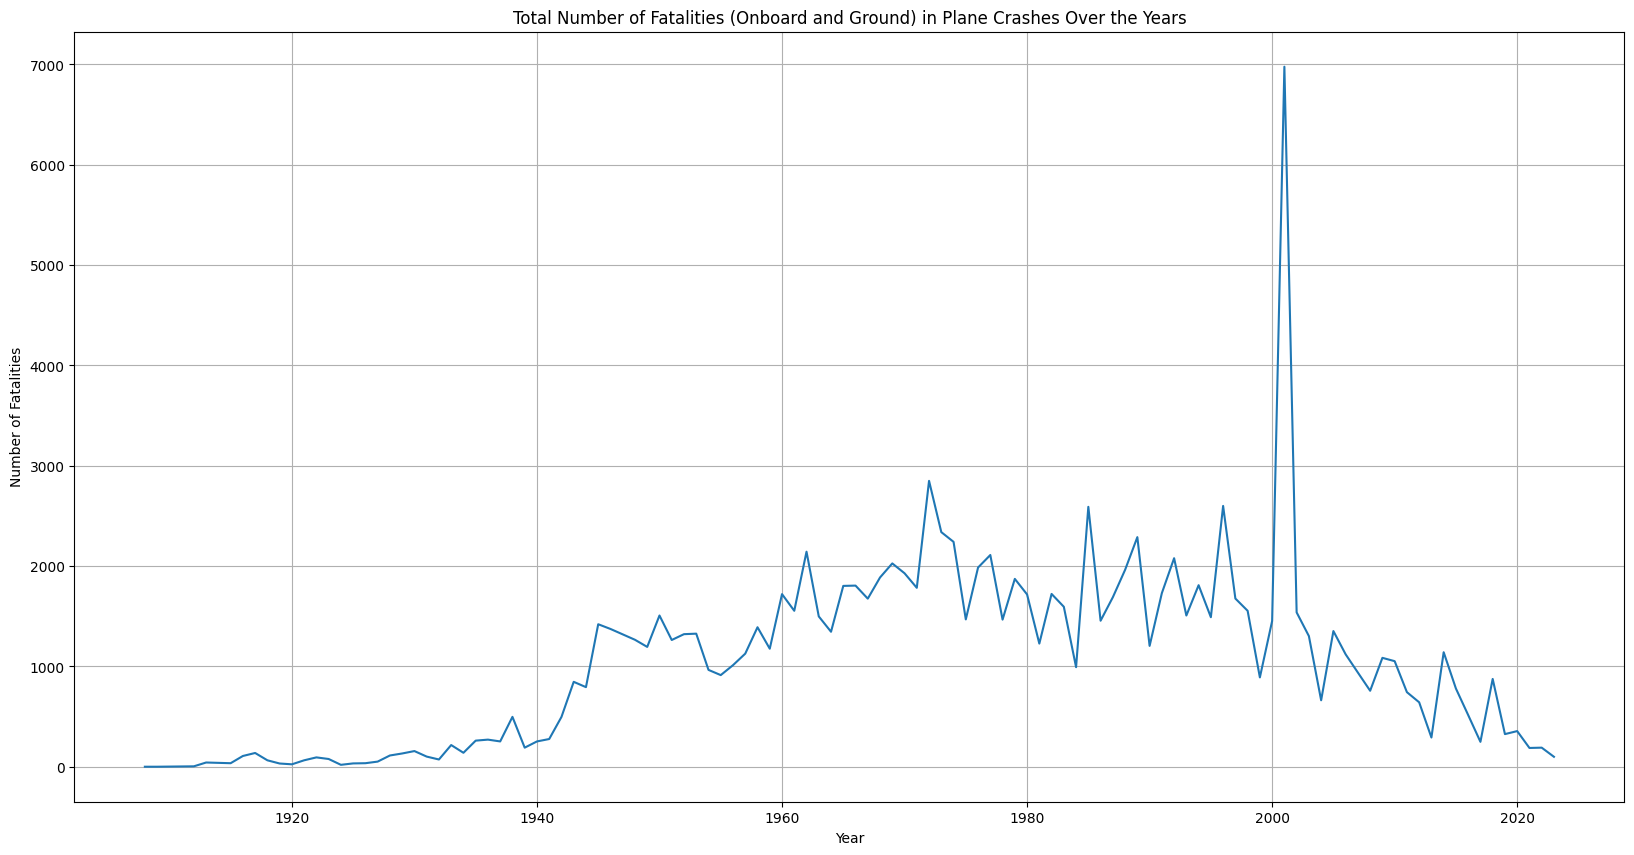

In [492]:
# Correcting the selection of multiple columns in groupby using a list
total_fatalities_per_year = data.groupby('Year')['Total_Fatalities'].sum()

# Plotting the trend of total fatalities over the years with the corrected method
plt.figure(figsize=(20, 10))
sns.lineplot(x=total_fatalities_per_year.index, y=total_fatalities_per_year.values)
plt.title('Total Number of Fatalities (Onboard and Ground) in Plane Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()

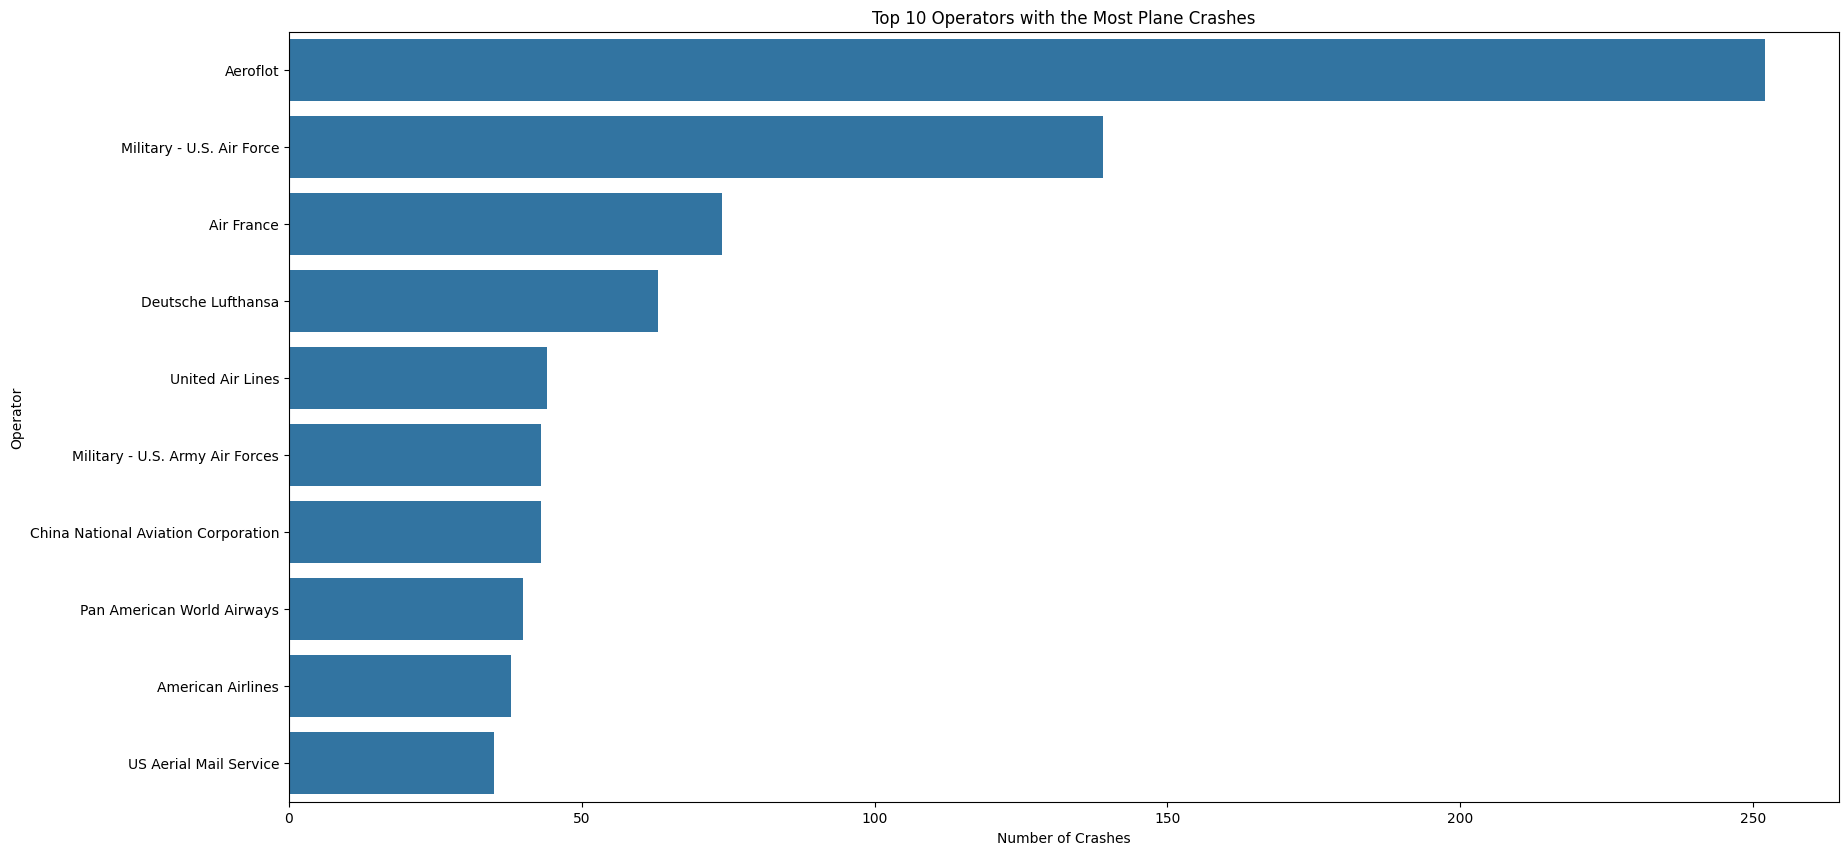

In [493]:
# Count the number of crashes per operator
crashes_per_operator = data['Operator'].value_counts()

# Filter for top 10 with head(10)
top_operators = crashes_per_operator.head(10)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=top_operators.values, y=top_operators.index)
plt.title('Top 10 Operators with the Most Plane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Operator')
plt.show()

Operators with least crashes are not counted since it's one crash for all the of them. Ones with no crashes are not counted.

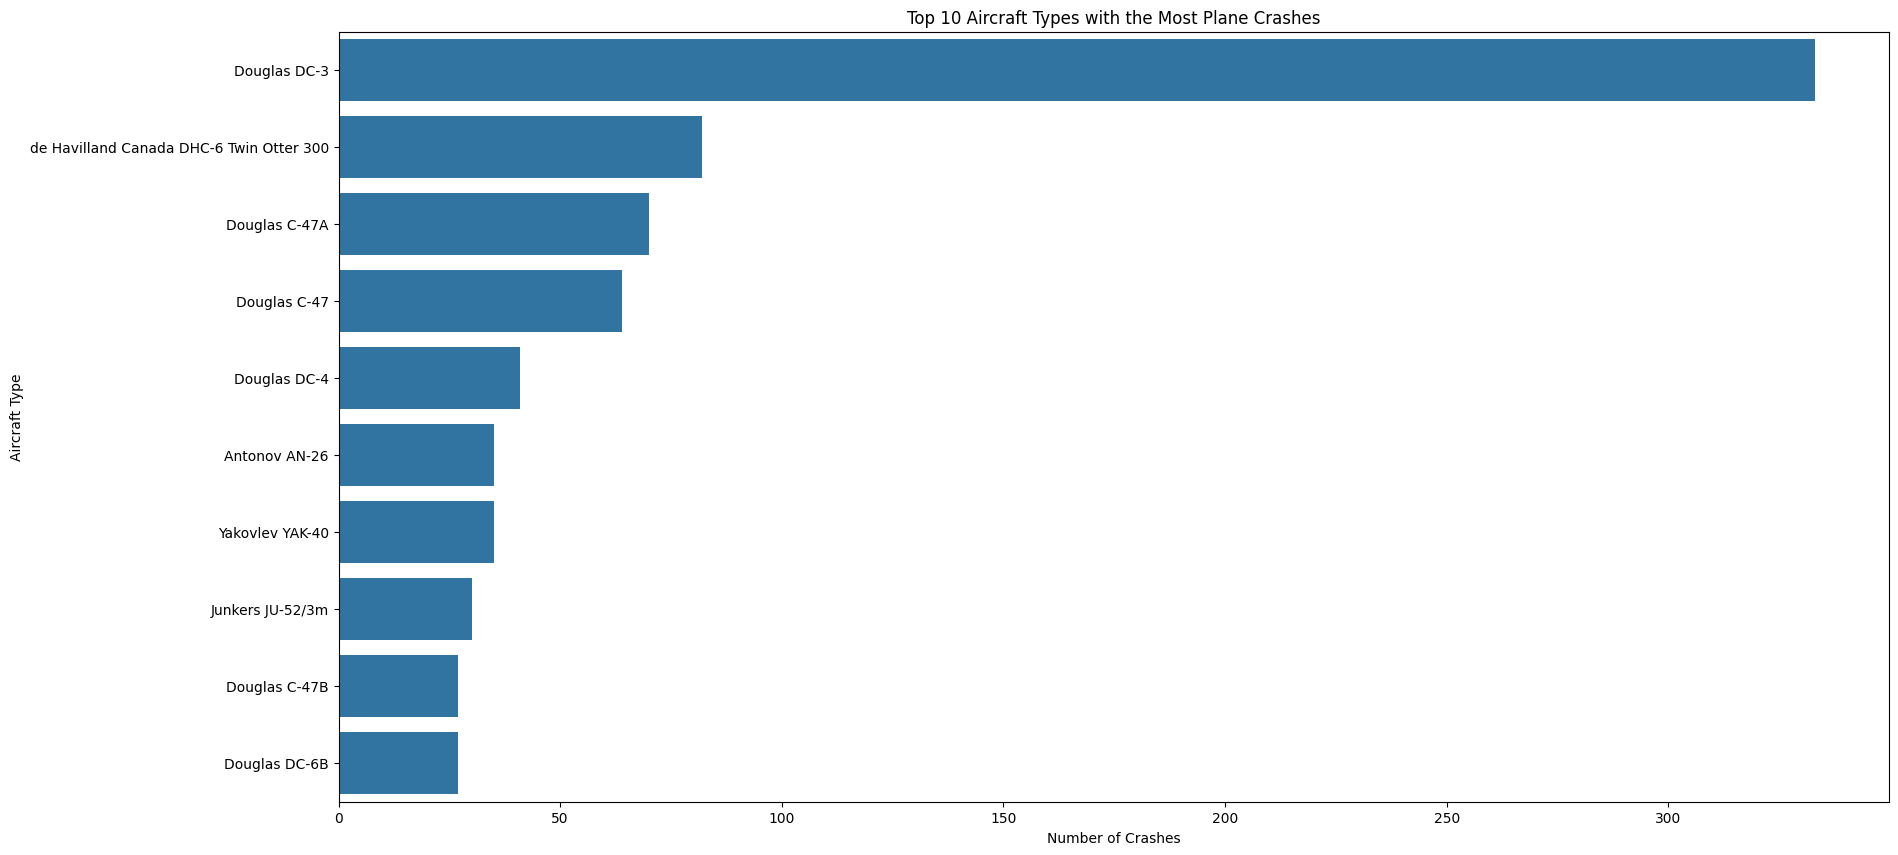

In [494]:
# Count the number of crashes per aircraft type
crashes_per_aircraft_type = data['Aircraft_Type'].value_counts()

# Filter for top 10
top_aircraft_types = crashes_per_aircraft_type.head(10)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=top_aircraft_types.values, y=top_aircraft_types.index)
plt.title('Top 10 Aircraft Types with the Most Plane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Aircraft Type')
plt.show()

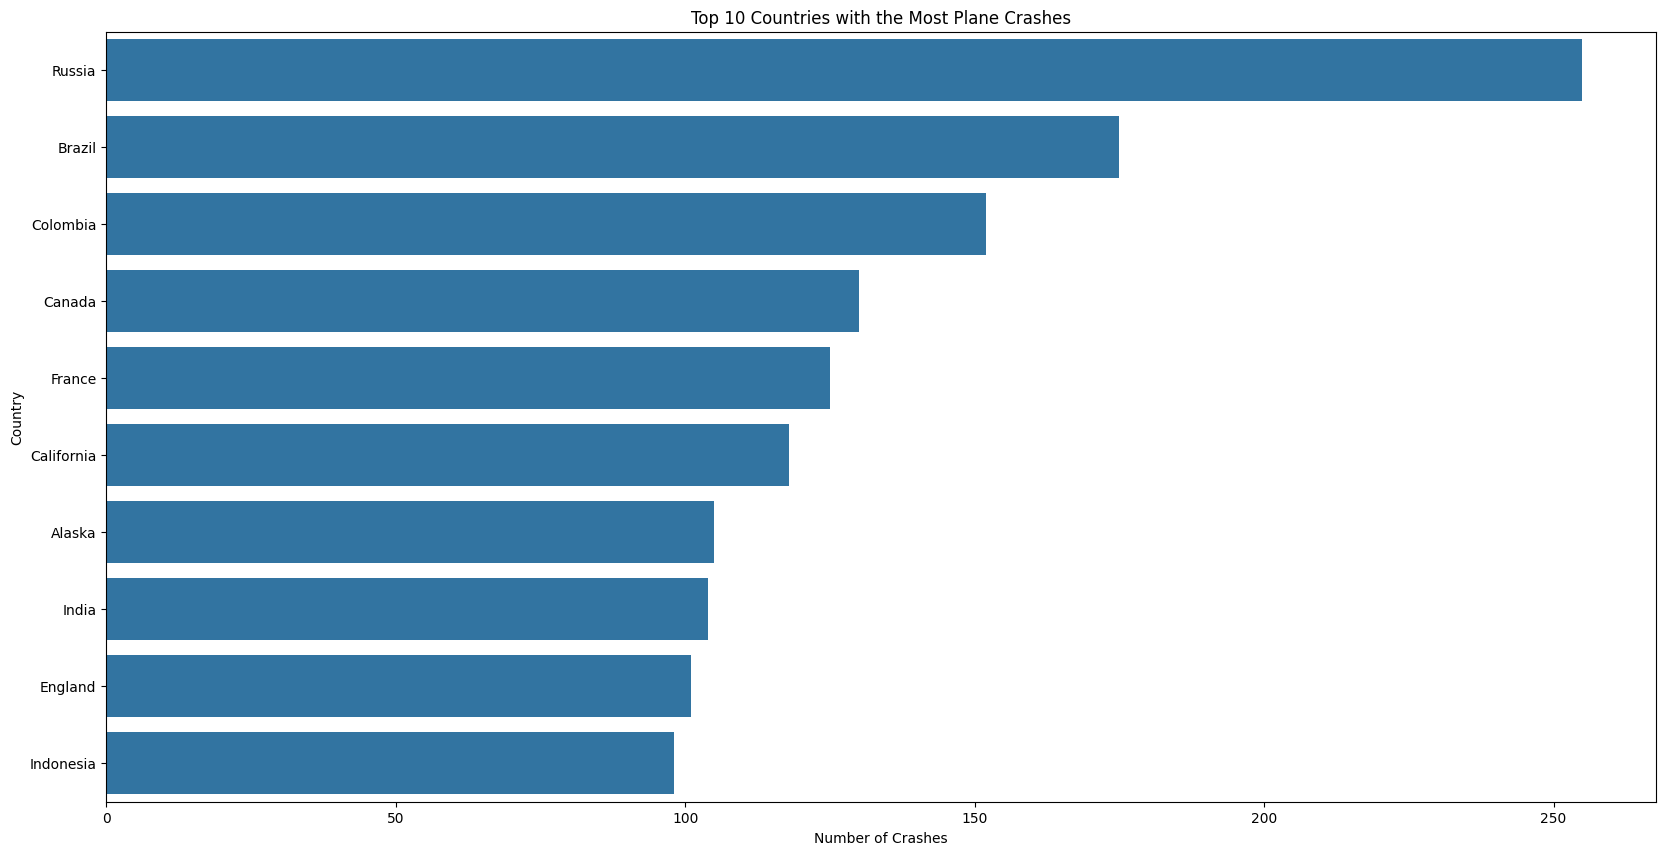

In [495]:
# Simplify the location data by extracting only the country names
# I probably should've seperated the country names when importing data
data['Country'] = data['Location'].apply(lambda x: x.split(',')[-1].strip())

# Count the number of crashes per country
crashes_per_country = data['Country'].value_counts()

# Use head to filter out the top 10 countries with the most crashes
top_countries = crashes_per_country.head(10)

# Plotting
plt.figure(figsize=(20, 10))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Most Plane Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Country')
plt.show()


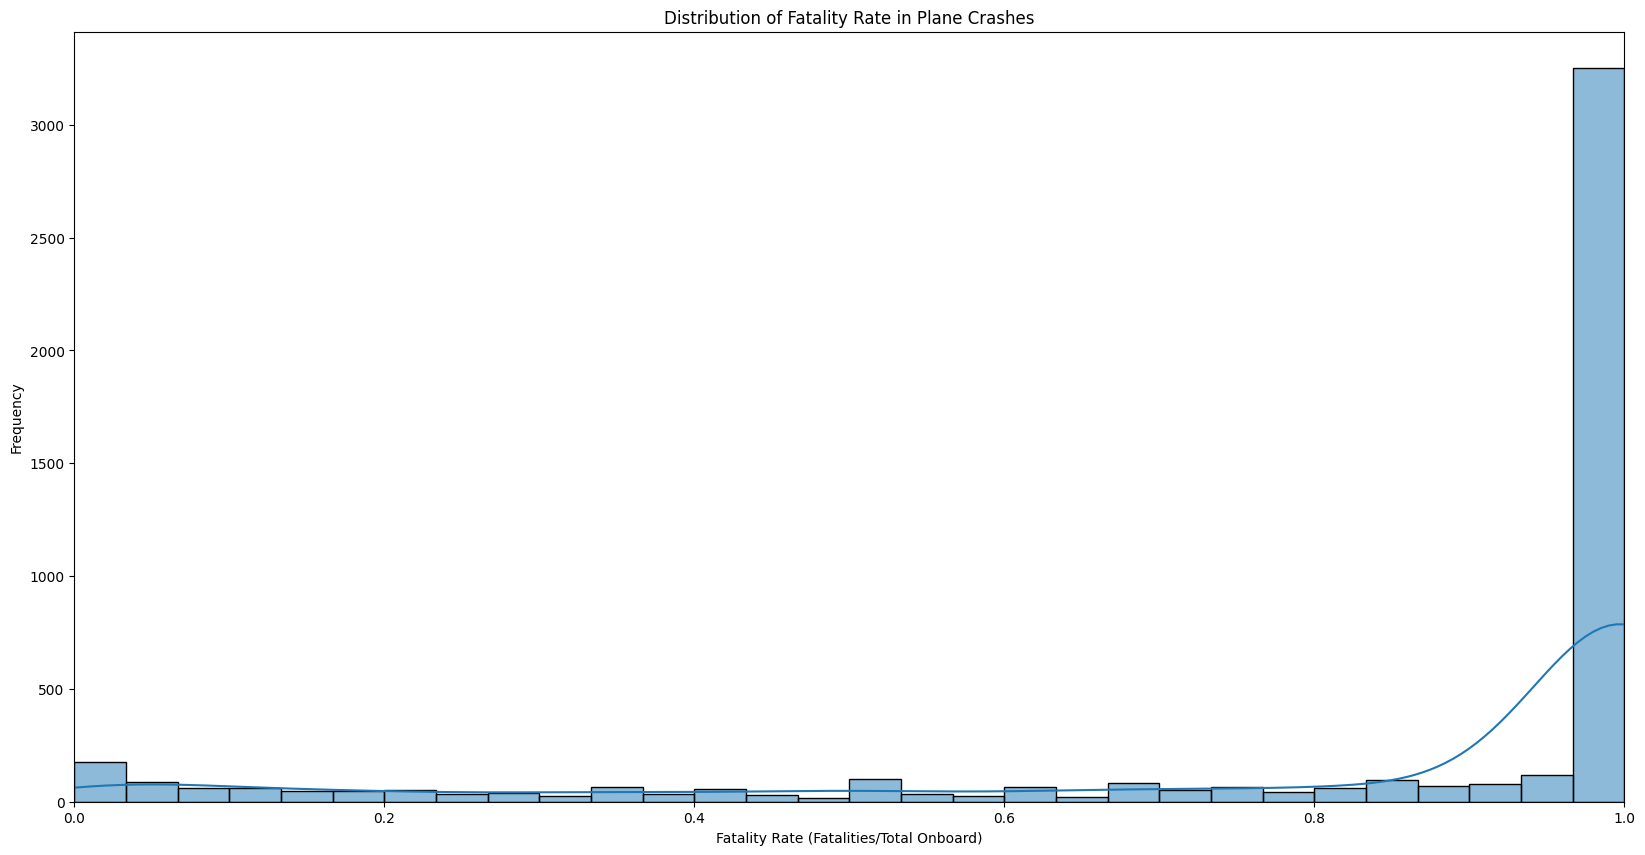

In [496]:
# Plotting the distribution of fatality rate
plt.figure(figsize=(20, 10))
sns.histplot(data['Fatality_Rate'], bins=30, kde=True)
plt.title('Distribution of Fatality Rate in Plane Crashes')
plt.xlabel('Fatality Rate (Fatalities/Total Onboard)')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis to valid fatality rate values
plt.show()

Seems most of the crashes are completely fatal. Not surpising. Plotting another graph, excluding 100% fatalities to see how the rest are distributed.

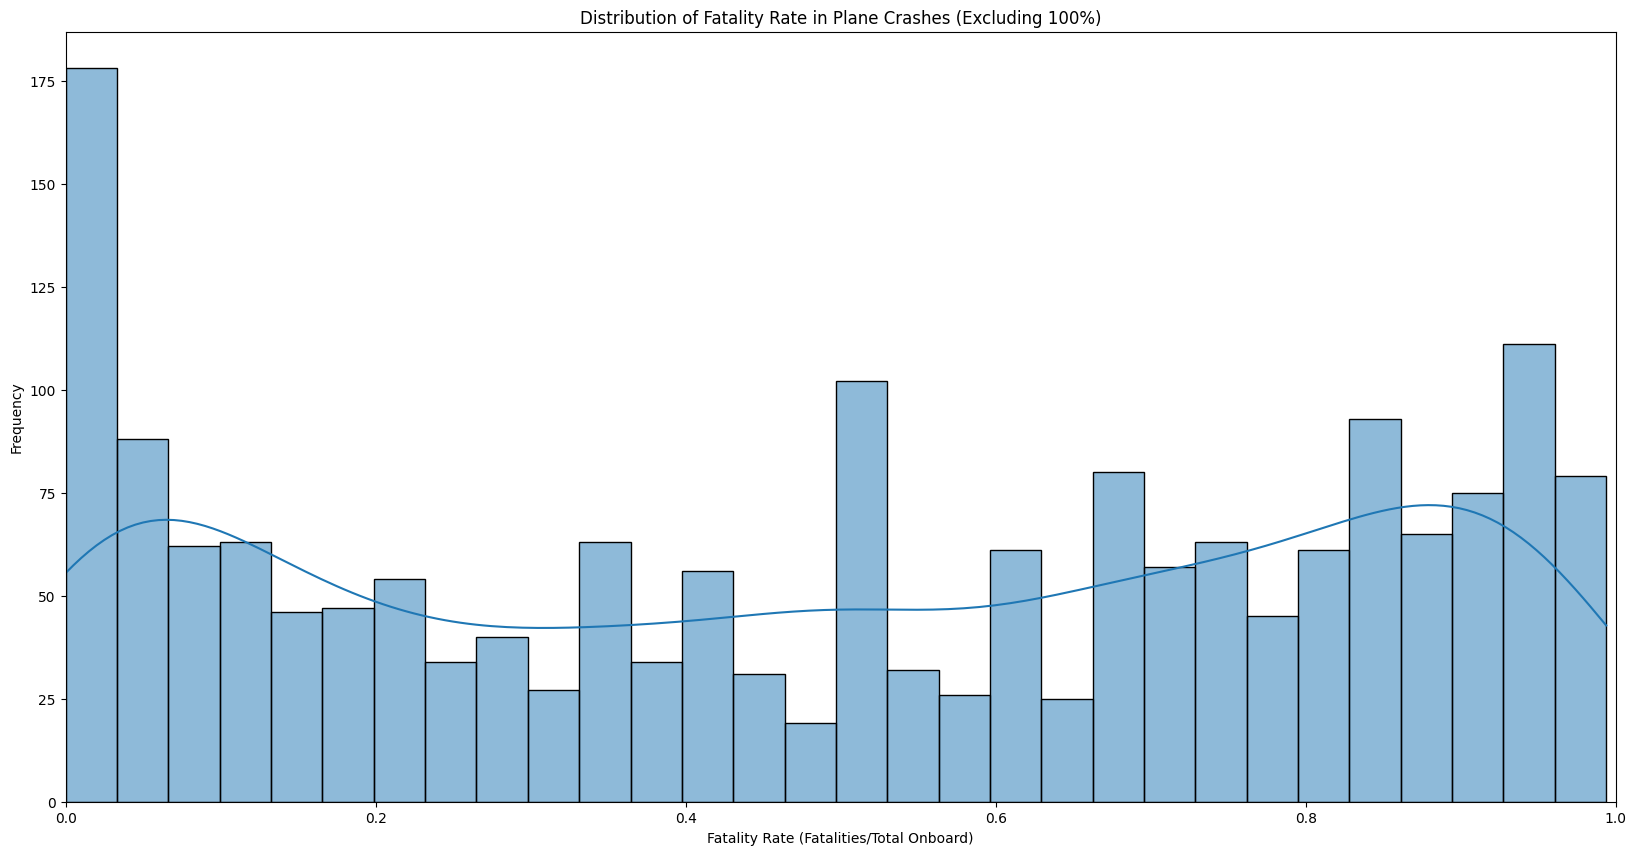

In [497]:
# Filtering out the data points with a fatality rate of 1.0
data_excluding_full_fatalities = data[data['Fatality_Rate'] < 1.0]

# Plotting the distribution of fatality rate excluding rates of 1.0
plt.figure(figsize=(20, 10))
sns.histplot(data_excluding_full_fatalities['Fatality_Rate'], bins=30, kde=True)
plt.title('Distribution of Fatality Rate in Plane Crashes (Excluding 100%)')
plt.xlabel('Fatality Rate (Fatalities/Total Onboard)')
plt.ylabel('Frequency')
plt.xlim(0, 1)  # Limit x-axis to valid fatality rate values
plt.show()

<h1>Advanced Visualizations</h1>

Scatterplot of aircrafts with the most crashes and most fatalities. Provide insight into which planes are the worst.

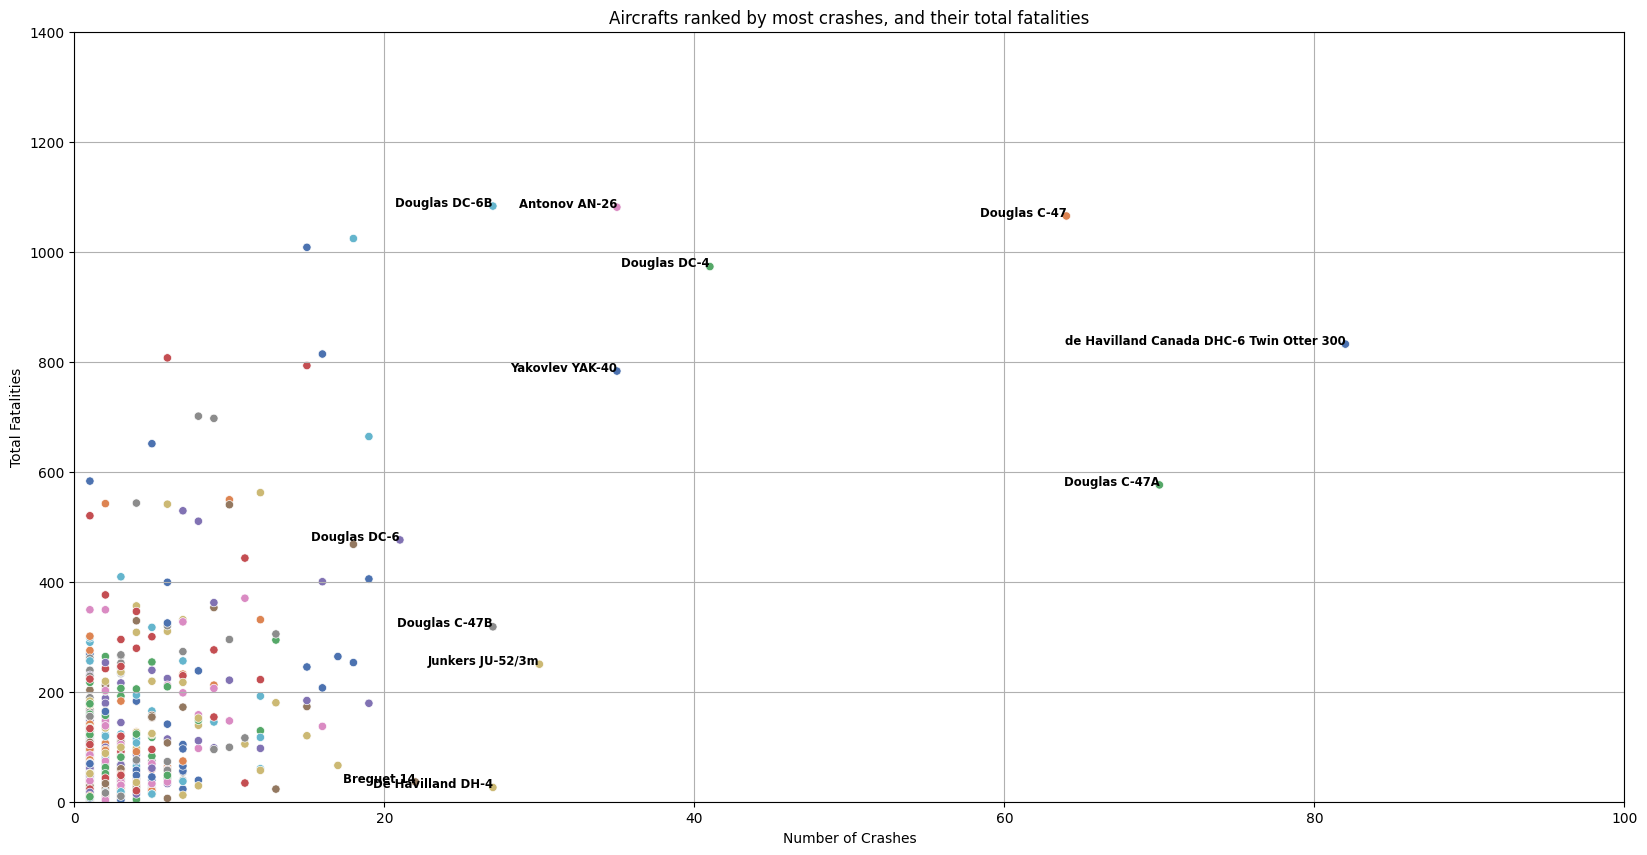

In [498]:
# Aggregating data by Aircraft_Type to get the number of crashes and total fatalities for each type
aggregated_data = data.groupby('Aircraft_Type').agg(
    Number_of_Crashes=pd.NamedAgg(column='Date', aggfunc='count'),
    Total_Fatalities=pd.NamedAgg(column='Total_Fatalities', aggfunc='sum')
).reset_index()


# Filtering the data for aircraft types with above 20 crashes
filtered_data_for_labeling = aggregated_data[
    (aggregated_data['Number_of_Crashes'] > 20) & 
    (aggregated_data['Total_Fatalities'] < 2000)# 9-11 begone
]

# Plotting the scatterplot
plt.figure(figsize=(20, 10))
sns.scatterplot(data=aggregated_data, x='Number_of_Crashes', y='Total_Fatalities', hue='Aircraft_Type', palette="deep", legend=False)

# Adding labels for the filtered aircraft types
for i in range(filtered_data_for_labeling.shape[0]):
    row = filtered_data_for_labeling.iloc[i]
    plt.text(row['Number_of_Crashes'], row['Total_Fatalities'], row['Aircraft_Type'], horizontalalignment='right', size='small', color='black', weight='semibold')

plt.title('Aircrafts ranked by most crashes, and their total fatalities')
plt.xlabel('Number of Crashes')
plt.ylabel('Total Fatalities')
plt.ylim(0, 1400)
plt.xlim(0, 100)
plt.grid(True)
plt.show()


Followup to check which year those planes were produced. Since no production date of planes are available, date of first crash will do.

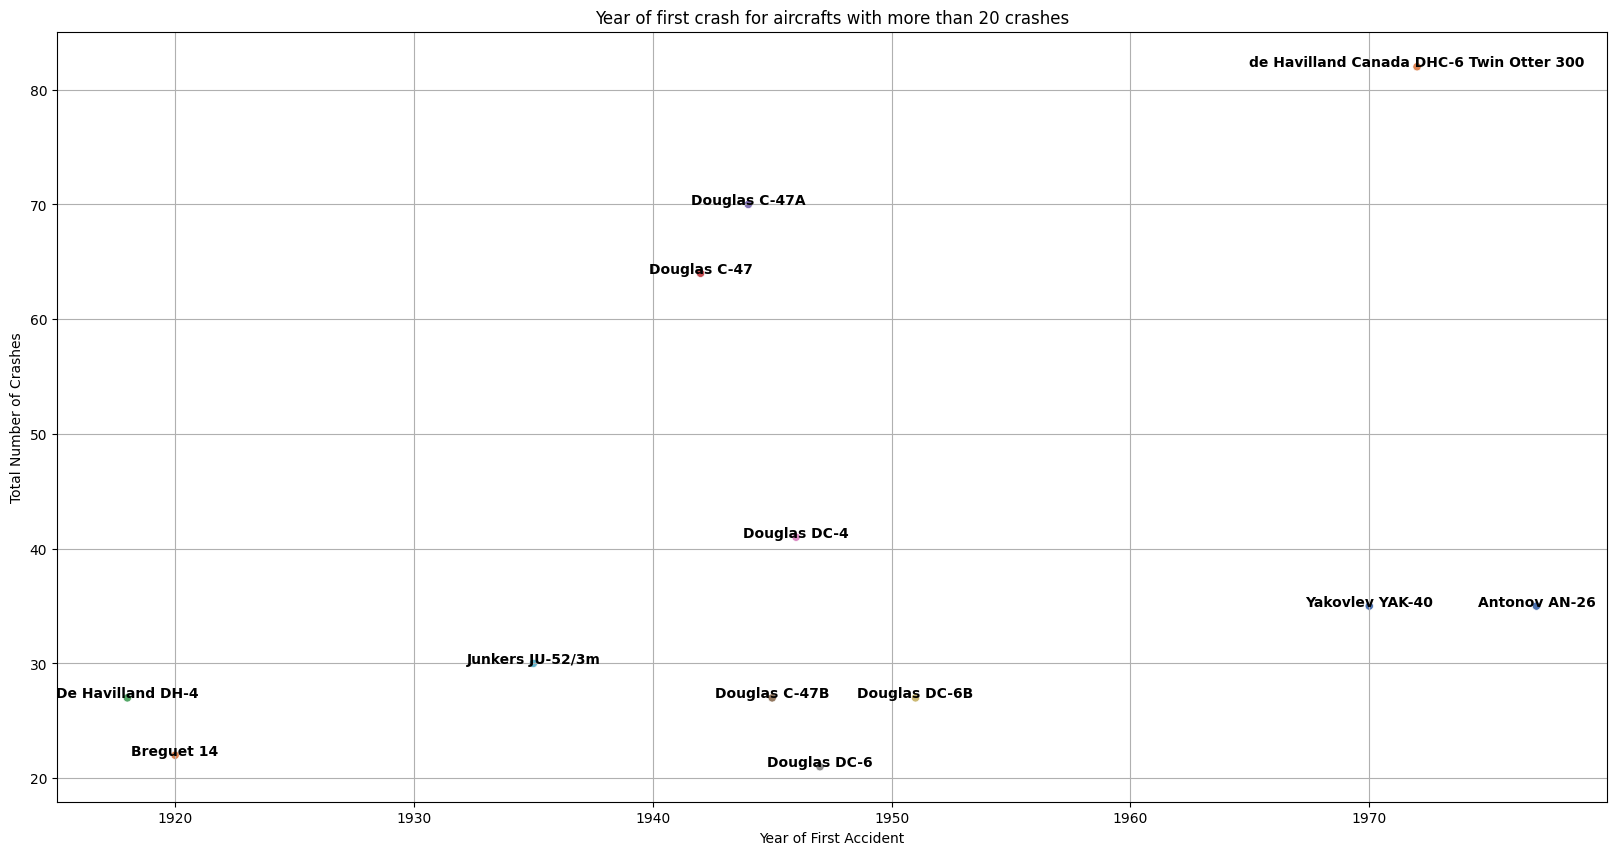

In [499]:
# aggregate of aircraft type, number of crashes, total fatalities, and year of first accident
aggregated_data_with_year = data.groupby('Aircraft_Type').agg(
    Number_of_Crashes=pd.NamedAgg(column='Date', aggfunc='count'),
    Total_Fatalities=pd.NamedAgg(column='Total_Fatalities', aggfunc='sum'),
    Year_of_First_Accident=pd.NamedAgg(column='Year', aggfunc='min')
).reset_index()

# Filtering the data for aircraft types with both above 20 crashes
filtered_data_for_scatterplot = aggregated_data_with_year[
    (aggregated_data_with_year['Number_of_Crashes'] > 20) & 
    (aggregated_data_with_year['Total_Fatalities'] < 2000) # 9-11 begone
]

# Plotting the scatterplot with total accidents as y, and year of first accidents as x
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_data_for_scatterplot, x='Year_of_First_Accident', y='Number_of_Crashes', hue='Aircraft_Type', palette="deep", legend=False)

# Adding labels for the filtered aircraft types
for i in range(filtered_data_for_scatterplot.shape[0]):
    row = filtered_data_for_scatterplot.iloc[i]
    plt.text(row['Year_of_First_Accident'], row['Number_of_Crashes'], row['Aircraft_Type'], horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('Year of first crash for aircrafts with more than 20 crashes')
plt.xlabel('Year of First Accident')
plt.ylabel('Total Number of Crashes')
plt.grid(True)
plt.show()


Combined with previous graph of number of crashes per yer, it seems the 40s to 50s were the worst times to fly. Make sense, since commercial aircrafts are becoming widly avaliable and safty wasn't a thing back then.

In addition, it seems the <h3>de Havilland Canada DHC-3 Otter</h3> is the worst plane in existence.